In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass
from sklearn.model_selection import train_test_split



In [8]:
from pandas.core.arrays.timedeltas import precision_from_unit
from sqlalchemy.sql.functions import current_user

@dataclass
class LogisticRegression:

    X :np.matrix
    y : np.array

    epsilon : np.float32
    learning_rate: np.float32
    max_iteration: int


    def __post_init__(self):
      self.X_train, self.X_test, self.y_train, self.y_test = self.split_data()
      # self.X_train, mean, std = self.normalize_train_data(self.X_train)
      pass

    def split_data(self):
      X_train,X_test,y_train,y_test=train_test_split(self.X,self.y,
                                                        test_size=0.3,
                                                        shuffle=True,
                                                        stratify=self.y)
      return X_train,X_test,y_train,y_test
      # return X_train.values(),X_test.values(),y_train.values(),y_test.values()

    def remove_idx(self,X_train,y_train,idx):
      self.X_train=self.X_train.drop(idx,axis=0)
      self.y_train=self.y_train.drop(idx,axis=0)
      return X_train,y_train

    def normalize_train_data(self,X) :
      # normalization
      mean = np.mean(X, axis= 0)
      std  = np.std(X, axis=0 )
      X_norm = (X - mean) / std
      return X_norm, mean, std

    def normalize_test_data(self,X, mean, std) :
      X_norm = (X - mean) / std
      return X_norm

    def sigmoid(self,z) :
      # calculating the sigmoid function
      sig=1/(1+np.exp(-z))
      return sig

    def predict(self,X):
      # prediction X.TRANSPOSE.THETA
      sig=self.sigmoid(X.dot(self.w))
      return np.around(sig)

    def cost_function(self,X,y):
      sig=self.sigmoid(X.dot(self.w))
      loss= y * np.log(sig)+ (1-y) * np.log(1-sig)
      cost= -loss.sum()
      return cost

    def cost_derivative(self,X,y):
      sig=self.sigmoid(X.dot(self.w))
      return (sig-y).dot(X)

    def gradient_desccent(self,X,y):
      # calculating the gradient descent
      errors =[]
      previous_error = float('inf')

      for i in tqdm(range(self.max_iteration), colour = 'blue'):
        self.w = self.w - self.learning_rate * self.cost_derivative(X,y)
        current_error = self.cost_function(X,y)
        errors.append(current_error)
        if abs(previous_error - current_error) < self.epsilon :
          print("model stopped ")
          break
        previous_error = current_error
      self.plot_cost(errors)

    def efficacy_report(self, y_hat, y):
      # calculating the precision, recall and f1-score
      y_hat = y_hat == 1
      y = y == 1
      tp = (y_hat & y).sum()
      recall = tp / y.sum()

      precision = tp/ (y_hat.sum())

      f1_score = (2*recall* precision) / (recall+precision)

      return recall, precision, f1_score

    def fit(self):
      # main function
      self.X_train , self.X_test, self.y_train, self.y_test = self.split_data()
      self.remove_idx(self.X_train,self.y_train,1)
      self.remove_idx(self.X_train,self.y_train,38)
      self.w=np.ones(self.X_train.shape[1],dtype=np.float64) * 0
      self.gradient_desccent(self.X_train,self.y_train)
      print(self.w)
      y_hat_train=self.predict(self.X_train)
      precision,recall,f1_score=self.efficacy_report(self.y_train,y_hat_train)
      print(' precision {}'.format(precision))
      print('recall of {}'.format(recall))
      print(' f1_score of {}'.format(f1_score))




    def plot_cost(self,cost_sequence):

        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t,s)

        ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1), loc=2,shadow=True)
        plt.show()



    def plot(self):
        plt.figure(figsize=(12,8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train.iloc[:, 0], self.X_train.iloc[:, 1],
                     self.sigmoid(self.X_train.dot(self.w)),
                     c = self.y_train.iloc[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)



    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train.iloc[:, 0], self.X_train.iloc[:, 1],
                   c=self.y_train.iloc[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')


    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))

        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train.iloc[:, 0], self.X_train.iloc[:, 1],
                   c=self.y_train.iloc[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()



In [7]:
df = pd.read_excel('/content/drive/MyDrive/Stats Learning/Lab3_data.xls')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
X=df.iloc[:,1:]
y=df.iloc[:,0]


In [ ]:
y

0     1
1     1
2     1
3     1
4     1
     ..
90    1
91    1
92    1
93    1
94    1
Name: y, Length: 95, dtype: int64

In [ ]:
X.shape

(95, 2)

100%|██████████| 100000/100000 [05:01<00:00, 331.48it/s]


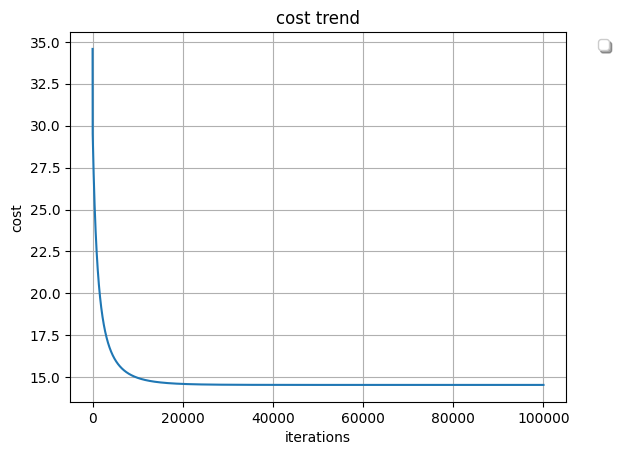

x1   -0.359114
x2    0.178490
dtype: float64
 precision 0.96
recall of 0.96
 f1_score of 0.96


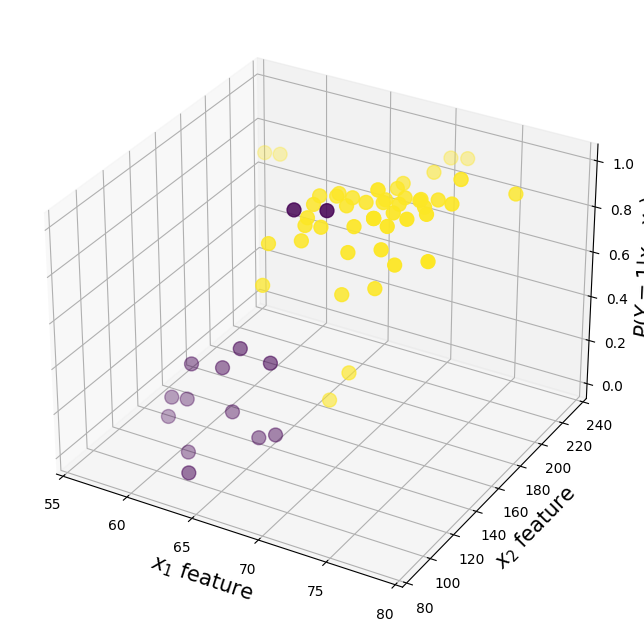

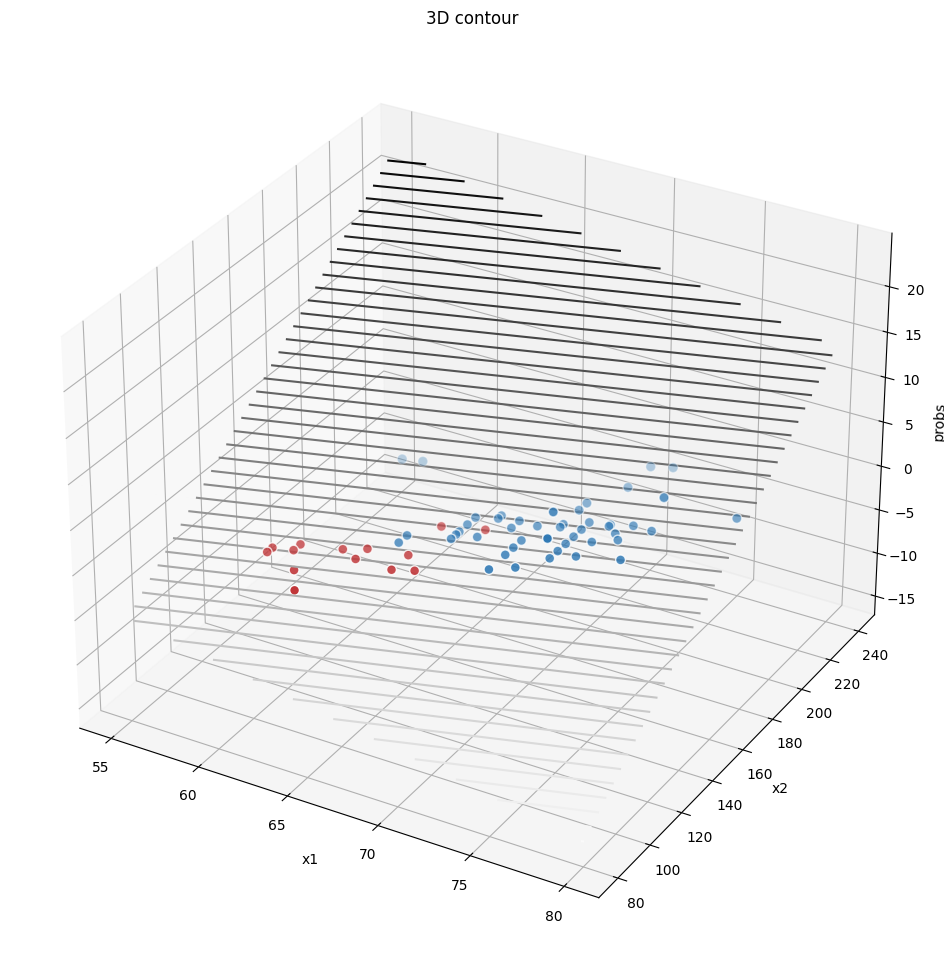

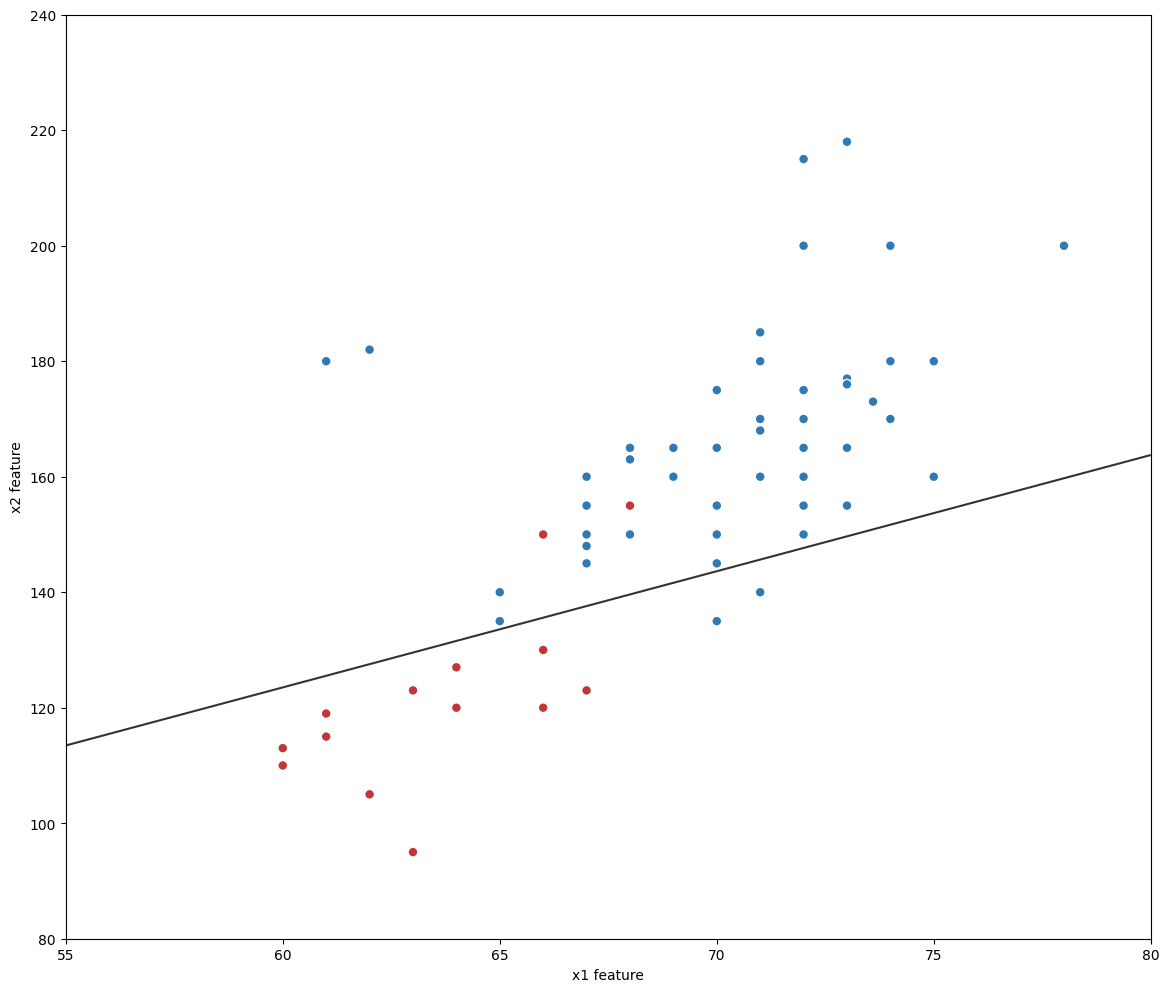

In [10]:
lr = LogisticRegression(X,y,epsilon=0.0, learning_rate=0.1e-5, max_iteration=100000)
lr.fit()
lr.plot()
lr.plot3D()
lr.scatterPlt()

# Observation:

We can clearly observe that the line seperates the datapoints into 2 different groups being class red and class blue points. The datapoints 1 and 39 were exactly on the line which didnt give the precise information to which class they belonged to. On removing these 2 points the prediction line also shifted towards the red class.

In [ ]:
!jupyter nbconvert --to html /content/Lab3_LogisticRegression.ipynb

[NbConvertApp] Converting notebook /content/Lab3_LogisticRegression.ipynb to html
[NbConvertApp] Writing 1149101 bytes to /content/Lab3_LogisticRegression.html
